In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
raw = [
    {"date":"2026-01-01","store":"A","menu":"Americano","price":"4500원","qty":"2","paid":"TRUE"},
    {"date":"2026/01/01","store":"A","menu":"Latte","price":"5,000","qty":1,"paid":"True"},
    {"date":"2026-01-02","store":"A","menu":"Latte","price":None,"qty":2,"paid":"FALSE"},
    {"date":"2026-01-03","store":"B","menu":"Mocha","price":"5500","qty":None,"paid":True},
    {"date":"2026-01-03","store":"B","menu":"Americano","price":"4500","qty":1,"paid":"TRUE"},
    {"date":"2026-01-04","store":"B","menu":"Latte","price":"5000원","qty":"3","paid":"TRUE"},
]
df = pd.DataFrame(raw)
df.head() 

,date,store,menu,price,qty,paid
0,2026-01-01,A,Americano,4500원,2,TRUE
1,2026/01/01,A,Latte,"5,000",1,True
2,2026-01-02,A,Latte,None,2,FALSE
3,2026-01-03,B,Mocha,5500,None,True
4,2026-01-03,B,Americano,4500,1,TRUE


In [25]:
df.info()
# 문자열 아닌 cols Dtype = object -> 문자열 등 결측치 존재!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    6 non-null      object
 1   store   6 non-null      object
 2   menu    6 non-null      object
 3   price   5 non-null      object
 4   qty     5 non-null      object
 5   paid    6 non-null      object
dtypes: object(6)
memory usage: 420.0+ bytes


In [26]:
# 날짜
df["date"] = pd.to_datetime(df["date"], errors="coerce")

# price 숫자화: "4500원", "5,000" 처리
df["price"] = (
    df["price"].astype("string")
    .str.replace(",", "", regex=False)
    .str.replace("원", "", regex=False)
)
df["price"] = pd.to_numeric(df["price"], errors="coerce")

# qty 숫자화
df["qty"] = pd.to_numeric(df["qty"], errors="coerce")

# paid bool로 통일
df["paid"] = (df["paid"].astype("string").str.upper() == "TRUE")

# 매출
df["sales"] = df["price"] * df["qty"]

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    5 non-null      datetime64[ns]
 1   store   6 non-null      object        
 2   menu    6 non-null      object        
 3   price   5 non-null      Int64         
 4   qty     5 non-null      float64       
 5   paid    6 non-null      boolean       
 6   sales   4 non-null      Float64       
dtypes: Float64(1), Int64(1), boolean(1), datetime64[ns](1), float64(1), object(2)
memory usage: 444.0+ bytes


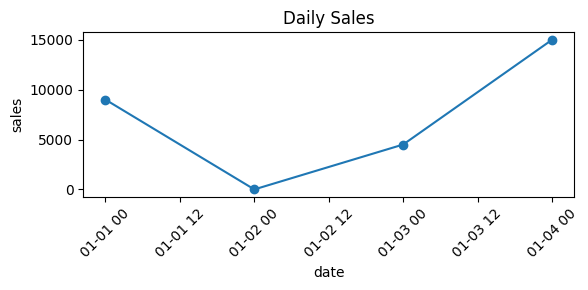

In [27]:
daily = df.groupby("date", as_index=False)["sales"].sum()

plt.figure(figsize=(6,3))
plt.plot(daily["date"], daily["sales"], marker="o")
plt.title("Daily Sales")
plt.xlabel("date")
plt.ylabel("sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

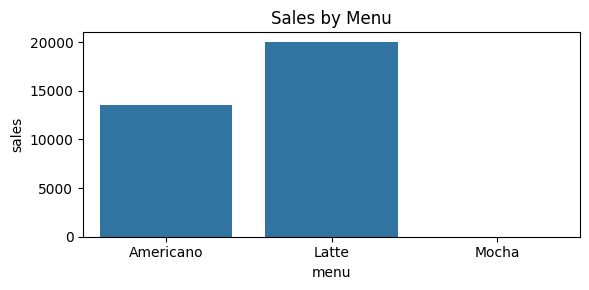

In [28]:
menu_sales = df.groupby("menu", as_index=False)["sales"].sum()

plt.figure(figsize=(6,3))
sns.barplot(data=menu_sales, x="menu", y="sales")
plt.title("Sales by Menu")
plt.tight_layout()
plt.show()

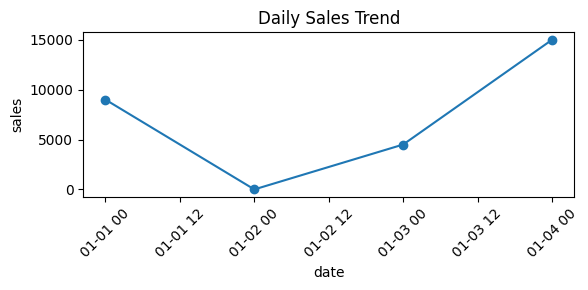

In [29]:
daily = df.groupby("date", as_index=False)["sales"].sum().sort_values("date")

plt.figure(figsize=(6,3))
plt.plot(daily["date"], daily["sales"], marker="o")
plt.title("Daily Sales Trend")
plt.xlabel("date"); plt.ylabel("sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [30]:
df_a = df[df["store"] == "A"].dropna(subset=["date"]).copy()

df_a

,date,store,menu,price,qty,paid,sales
0,2026-01-01,A,Americano,4500,2.0,True,9000.0
2,2026-01-02,A,Latte,<NA>,2.0,False,<NA>


In [ ]:
daily_a = df_a.groupby("date", as_index=False)["sales"].sum().sort_values("date")
daily_a

,date,sales
0,2026-01-01,9000.0
1,2026-01-02,0.0


In [32]:
df_b = df[df["store"] == "B"].dropna(subset=["date"]).copy()
daily_b = df_b.groupby("date", as_index=False)["sales"].sum().sort_values("date")
daily_b

,date,sales
0,2026-01-03,4500.0
1,2026-01-04,15000.0


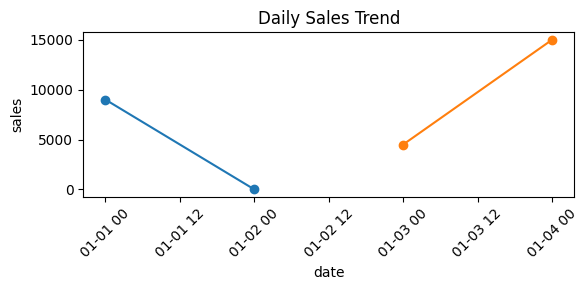

In [36]:
daily_a = df_a.groupby("date", as_index=False)["sales"].sum().sort_values("date")

plt.figure(figsize=(6,3))
plt.plot(daily_a["date"], daily_a["sales"], marker="o")
plt.plot(daily_b["date"], daily_b["sales"], marker="o")
plt.title("Daily Sales Trend")
plt.xlabel("date"); plt.ylabel("sales")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

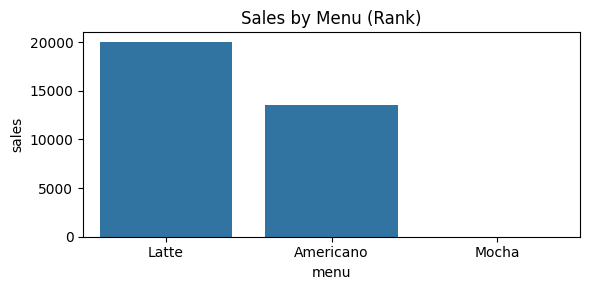

In [37]:
menu_sales = (df.groupby("menu", as_index=False)["sales"]
              .sum()
              .sort_values("sales", ascending=False))

plt.figure(figsize=(6,3))
sns.barplot(data=menu_sales, x="menu", y="sales")
plt.title("Sales by Menu (Rank)")
plt.tight_layout()
plt.show()

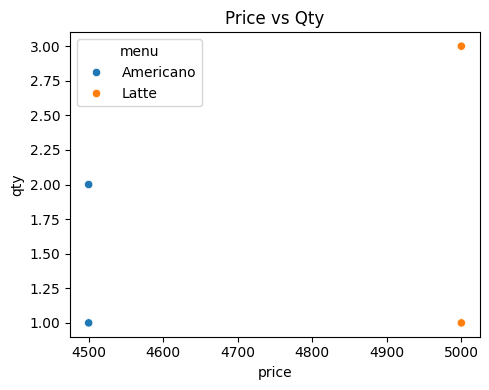

In [38]:
tmp = df.dropna(subset=["price","qty"])

plt.figure(figsize=(5,4))
sns.scatterplot(data=tmp, x="price", y="qty", hue="menu")
plt.title("Price vs Qty")
plt.tight_layout()
plt.show()

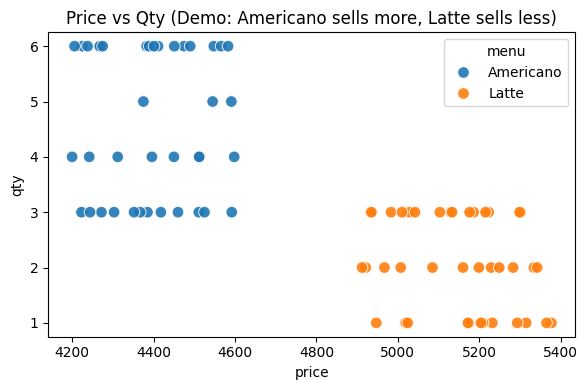

,menu,price,qty,sales
0,Americano,4375,5,21875
1,Americano,4396,4,17584
2,Americano,4225,6,25350
3,Americano,4267,6,25602
4,Americano,4411,6,26466


In [66]:
np.random.seed(7)

n = 40  # 점 개수(원하는 만큼 늘려도 됨)

# Americano: 저가 + 수량 많음
a_price = np.random.randint(4200, 4601, size=n)
a_qty   = np.random.randint(3, 7, size=n)   # 3~6

# Latte: 고가 + 수량 적음
l_price = np.random.randint(4900, 5401, size=n)
l_qty   = np.random.randint(1, 4, size=n)   # 1~3

df_demo = pd.DataFrame({
    "menu":  ["Americano"] * n + ["Latte"] * n,
    "price": np.concatenate([a_price, l_price]),
    "qty":   np.concatenate([a_qty, l_qty]),
})

# (선택) 판매금액도 같이 보고 싶으면
df_demo["sales"] = df_demo["price"] * df_demo["qty"]

# 산점도
plt.figure(figsize=(6,4))
sns.scatterplot(data=df_demo, x="price", y="qty", hue="menu", s=70, alpha=0.9)

plt.title("Price vs Qty (Demo: Americano sells more, Latte sells less)")
plt.xlabel("price")
plt.ylabel("qty")
plt.tight_layout()
plt.show()

df_demo.head()

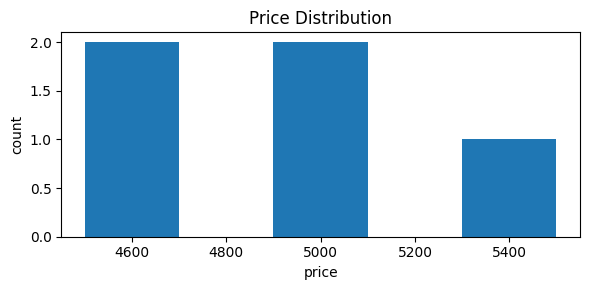

In [67]:
tmp = df.dropna(subset=["price"])

plt.figure(figsize=(6,3))
plt.hist(tmp["price"], bins=5)
plt.title("Price Distribution")
plt.xlabel("price")
plt.ylabel("count")
plt.tight_layout()
plt.show()

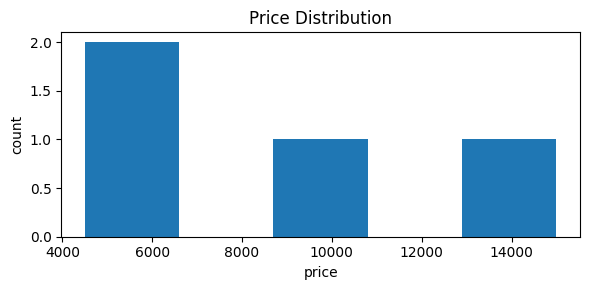

In [71]:
s = df["sales"].dropna()

plt.figure(figsize=(6,3))
plt.hist(s, bins=5)
plt.title("Price Distribution")
plt.xlabel("price")
plt.ylabel("count")
plt.tight_layout()
plt.show()

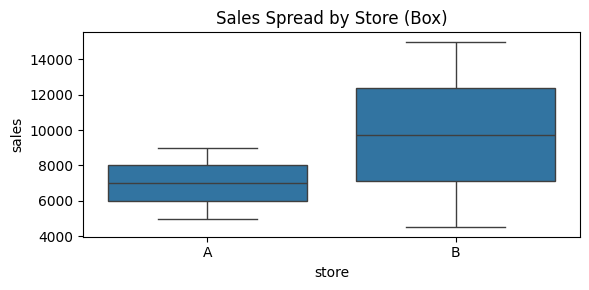

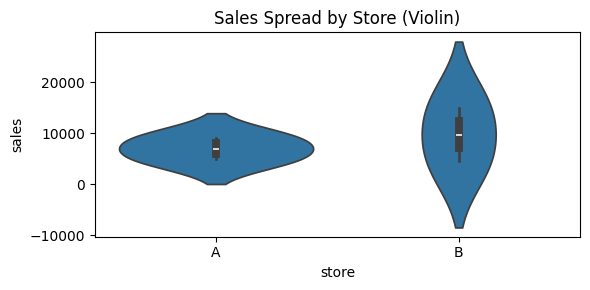

In [72]:
tmp = df.dropna(subset=["sales"])

plt.figure(figsize=(6,3))
sns.boxplot(data=tmp, x="store", y="sales")
plt.title("Sales Spread by Store (Box)")
plt.tight_layout()
plt.show()

plt.figure(figsize=(6,3))
sns.violinplot(data=tmp, x="store", y="sales")
plt.title("Sales Spread by Store (Violin)")
plt.tight_layout()
plt.show()